In [2]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import xgboost as xgb
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, precision_score, recall_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB

In [36]:
df = pd.read_pickle('../data/df_final.pkl')
df = df[(df['Season']>2009)&df['Inj_Loc_Knee'].eq(1)]#['Inj_Duration_Cat'].value_counts()

In [18]:
null_col = ['days_lst_gm', 'mp_lst_gm', 'pts_last_game', 'reb_lst_gm', 'ast_lst_gm',
            'pm_lst_gm', 'gms_7d', 't_mp_7d', 't_pm_7d', 'mpg_7d', 'ppg_7d',
            'rpg_7d', 'apg_7d', 'pmg_7d', 'gms_14d', 't_mp_14d', 't_pm_14d',
            'mpg_14d', 'ppg_14d', 'rpg_14d', 'apg_14d', 'pmg_14d', 'gms_30d',
            't_mp_30d', 't_pm_30d', 'mpg_30d', 'ppg_30d', 'rpg_30d', 'apg_30d',
            'pmg_30d', 'gms_szn', 't_mp_szn', 't_pm_szn', 'mpg_szn', 'ppg_szn',
            'rpg_szn', 'apg_szn', 'pmg_szn', 'gms_career_b4', 't_mp_career_b4',
            't_pm_career_b4', 'mpg_career_b4', 'ppg_career_b4', 'rpg_career_b4',
            'apg_career_b4', 'pmg_career_b4']

In [37]:
# MinMaxScaler().fit_transform(df.iloc[:,3:-1])
df

,player,Team,bbref_id,height,weight,age,Season,days_lst_gm,mp_lst_gm,pts_last_game,...,Inj_Type_Soft_Tissue_2,Inj_Type_Dislocation,Inj_Type_Concussion,Inj_Type_Swell,Inj_Type_Sprain_Strain,Inj_Type_Break,Inj_Type_Cut,Surgery,On_IL,Inj_Duration_Cat
29916,Tim Thomas,Mavericks,thomati01,82,230,32.57,2010,152.0,10.02,4.0,...,0,0,0,0,0,1,0,1,0,Weeks
29917,Matt Harpring,Jazz,harprma01,79,231,33.31,2010,149.0,4.30,2.0,...,0,0,0,0,0,0,0,0,0,Out Of NBA
29919,C.J. Watson,Warriors,watsocj01,74,175,25.45,2010,168.0,44.83,20.0,...,0,0,0,0,1,0,0,0,0,Weeks
29920,Henry Walker,Celtics,walkebi01,78,220,21.98,2010,137.0,2.13,0.0,...,0,0,0,0,0,1,0,1,0,Weeks
29937,Adonal Foyle,Magic,foylead01,82,250,34.62,2010,164.0,0.83,0.0,...,0,0,0,0,0,0,0,1,0,Out Of NBA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62149,Giannis Antetokounmpo,Bucks,antetgi01,83,242,26.44,2021,1.0,33.65,15.0,...,0,0,0,0,0,0,0,0,0,Days
62152,Bobby Portis,Bucks,portibo01,82,250,26.26,2021,1.0,19.27,14.0,...,1,0,0,0,0,0,0,0,0,Days
62168,Thanasis Antetokounmpo,Bucks,antetth01,78,219,28.83,2021,2.0,15.03,0.0,...,0,0,0,0,0,0,0,0,1,Weeks
62205,Kentavious Caldwell-Pope,Lakers,caldwke01,77,204,28.28,2021,3.0,25.95,5.0,...,0,0,0,1,0,0,0,0,1,Few Days


In [38]:
X_ = df.iloc[:,3:]
# X_
X_[null_col[1:]] = X_[null_col[1:]].fillna(0)
X_.dropna(inplace=True)
# X_.drop('bbref_id', axis=1, inplace=True)
# X_ = pd.get_dummies(X_['Team'], drop_first=True).join(X_.iloc[:,1:])
X, y = X_.iloc[:,:-1].astype(float), X_.iloc[:,-1].cat.codes
X[X.columns] = MinMaxScaler().fit_transform(X)
X

,height,weight,age,Season,days_lst_gm,mp_lst_gm,pts_last_game,reb_lst_gm,ast_lst_gm,pm_lst_gm,...,Inj_Type_Soft_Tissue_1,Inj_Type_Soft_Tissue_2,Inj_Type_Dislocation,Inj_Type_Concussion,Inj_Type_Swell,Inj_Type_Sprain_Strain,Inj_Type_Break,Inj_Type_Cut,Surgery,On_IL
29916,0.684211,0.420732,0.633142,0.0,0.244767,0.208420,0.085106,0.043478,0.0000,0.500000,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
29917,0.526316,0.426829,0.668582,0.0,0.239936,0.089204,0.042553,0.086957,0.0625,0.523810,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
29919,0.263158,0.085366,0.292146,0.0,0.270531,0.933931,0.425532,0.304348,0.7500,0.535714,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
29920,0.473684,0.359756,0.125958,0.0,0.220612,0.043977,0.000000,0.000000,0.0000,0.583333,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
29937,0.684211,0.542683,0.731322,0.0,0.264090,0.016882,0.000000,0.000000,0.0000,0.488095,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62149,0.736842,0.493902,0.339559,1.0,0.001610,0.700917,0.319149,0.391304,0.2500,0.761905,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
62152,0.684211,0.542683,0.330939,1.0,0.001610,0.401209,0.297872,0.130435,0.0625,0.666667,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
62168,0.473684,0.353659,0.454023,1.0,0.003221,0.312839,0.000000,0.043478,0.0625,0.500000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
62205,0.421053,0.262195,0.427682,1.0,0.004831,0.540434,0.106383,0.173913,0.0000,0.654762,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y)

In [33]:
from imblearn.over_sampling import SMOTE
sm = SMOTE()
X_train, y_train = sm.fit_resample(X_train, y_train)


In [40]:
rf = RandomForestClassifier(verbose=True, n_jobs=-1, n_estimators=500)
rf.fit(X_train, y_train)
rf.score(X_test, y_test)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    0.8s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done 500 out of 500 | elapsed:    0.2s finished


0.43897216274089934

(20762, 115)

Index(['t_mp_7d', 't_mp_szn', 'mp_lst_gm', 'mpg_7d', 't_pm_szn', 'gms_szn',
       'days_lst_gm', 'gms_career_b4', 'mpg_career_b4', 'pmg_career_b4',
       't_mp_career_b4', 'ppg_career_b4', 'pmg_szn', 'age', 'mpg_14d',
       'apg_career_b4', 'ppg_7d', 'ppg_14d', 'rpg_career_b4', 't_pm_career_b4',
       'pmg_14d', 'pm_lst_gm', 'mpg_szn', 'ppg_30d', 'ppg_szn', 'rpg_7d',
       'Num_Inj_Career', 't_pm_14d', 't_mp_14d', 'Inj_Date_Day', 'rpg_szn',
       'rpg_14d', 't_mp_30d', 'pmg_30d', 'mpg_30d', 'Num_Inj_Season',
       't_pm_30d', 'weight', 'rpg_30d', 'pmg_7d', 'Inj_Date_Year', 'apg_szn',
       'Season', 'apg_30d', 'pts_last_game', 't_pm_7d', 'apg_14d',
       'reb_lst_gm', 'apg_7d'],
      dtype='object')

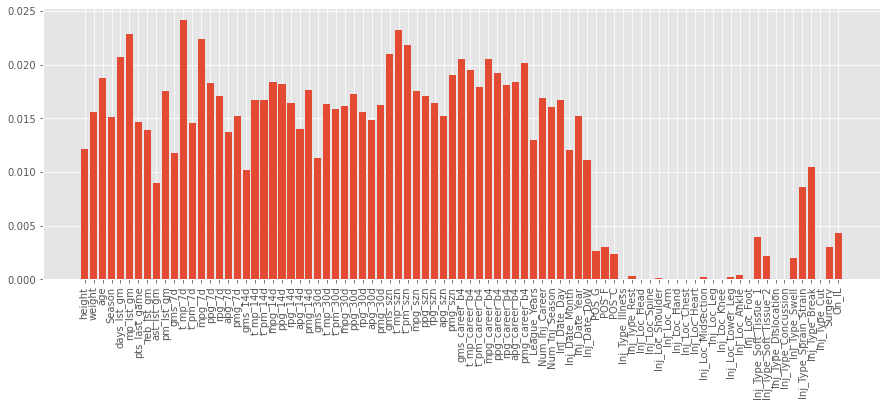

In [41]:
plt.figure(figsize=(15,5))
plt.bar(X.columns,rf.feature_importances_)
plt.xticks(rotation=90)
X.columns[np.argsort(rf.feature_importances_)[-1:-50:-1]]

In [27]:
X.isnull().sum()[X.isnull().sum() > 0]

days_lst_gm    347
dtype: int64

In [18]:
(100*df.isnull().sum()[df.isnull().sum() > 0]/len(df)).index

Index(['days_lst_gm', 'mp_lst_gm', 'pts_last_game', 'reb_lst_gm', 'ast_lst_gm',
       'pm_lst_gm', 'gms_7d', 't_mp_7d', 't_pm_7d', 'mpg_7d', 'ppg_7d',
       'rpg_7d', 'apg_7d', 'pmg_7d', 'gms_14d', 't_mp_14d', 't_pm_14d',
       'mpg_14d', 'ppg_14d', 'rpg_14d', 'apg_14d', 'pmg_14d', 'gms_30d',
       't_mp_30d', 't_pm_30d', 'mpg_30d', 'ppg_30d', 'rpg_30d', 'apg_30d',
       'pmg_30d', 'gms_szn', 't_mp_szn', 't_pm_szn', 'mpg_szn', 'ppg_szn',
       'rpg_szn', 'apg_szn', 'pmg_szn', 'gms_career_b4', 't_mp_career_b4',
       't_pm_career_b4', 'mpg_career_b4', 'ppg_career_b4', 'rpg_career_b4',
       'apg_career_b4', 'pmg_career_b4'],
      dtype='object')

In [65]:
[100]*5

[100, 100, 100, 100, 100]

In [26]:
from sklearn.neural_network import MLPClassifier
snn_classifier = MLPClassifier(verbose=True, hidden_layer_sizes = [100]*5)
snn_classifier.fit(X_train, y_train)
snn_classifier.score(X_test, y_test)
# snn_predictions = snn_classifier.predict(training_inputs)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [69]:
from imblearn.over_sampling import SMOTE
sm = SMOTE()
resampled_X_train, resampled_y_train = sm.fit_resample(X_train, y_train)

In [25]:
snn_classifier = MLPClassifier(verbose=True, hidden_layer_sizes = [100]*5)
snn_classifier.fit(resampled_X_train, resampled_y_train)
snn_classifier.score(X_test, y_test)

NameError: name 'resampled_X_train' is not defined

In [24]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.neural_network import MLPClassifier

dnns_classifier = OneVsRestClassifier(MLPClassifier(hidden_layer_sizes = [100]*5))
dnns_classifier.fit(X_train, y_train)
dnns_classifier.score(X_test, y_test)

# dnns_predictions_labels = dnns_classifier.predict(training_inputs)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [27]:
xgbc = xgb.XGBClassifier(n_jobs=-1,objective='multi:softmax')
m_train = xgb.DMatrix(X_train, y_train)

In [28]:
xgbc.fit(X_train, y_train)

/Users/mbun/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
[23:10:46] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=-1, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [29]:
xgbc.score(X_test, y_test)

0.3766318537859008